## Цель лабораторной работы – получение навыков работы с методами классификации

1. Изучить набор данных. Создать описание набора данных на русском языке. Описать
признаки, используемые в наборе данных (включить полученные описания в отчёт).
2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после
данной операции;
3. Оцените сбалансированность данных по классам (постройте гистограмму). Используйте
полученную информацию при выборе метрики оценки качества классификации (PR или ROC
кривая)
4. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot
для признаков до и после масштабирования. Выберите способ масштабирования
(например, нормализацию или стандартизацию);
5. Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
6. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с
наибольшим числом других (удалять признаки нужно только для линейных методов
классификации);
7. Заполните пропущенные значения в данных;
8. Решите поставленную задачу классификации в соответствии с заданием. При подборе
параметров классификатора используйте метод GridSearchCV и перекрёстную проверку
(изучите возможные для изменения параметры классификации). Определите схему
построения многоклассового классификатора, используемую по умолчанию (опишите
используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно,
многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех».
Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для
каждого из классов должны быть построены отдельные кривые, а также кривые для микро
и макроусреднения метрик качества). Для линейного классификатора используйте
регуляризацию.
9. Сравните кривые для классификаторов, указанных в задании, сделайте выводы.

# 1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт)

<table>
<caption style="text-align:center; font-weight: bold;color:black; font-size:20px; text-decoration:underline;">Titanic</caption>
    <thead>
        <th>Название</th>
        <th>Тип</th>
        <th>Описание</th>
    </thead>
    <tbody>
        <tr>
            <td>pclass</td>
            <td>Порядковый</td>
            <td>Класс пассажира</td>
        </tr>
        <tr>
            <td>survived</td>
            <td>Бинарный</td>
            <td>Выжил ли пассажир</td>
        </tr>
        <tr>
            <td>name</td>
            <td>Номинальный</td>
            <td>Имя пассажира</td>
        </tr>
        <tr>
            <td>sex</td>
            <td>Бинарный</td>
            <td>Пол пассажира</td>
        </tr>
        <tr>
            <td>age</td>
            <td>Количественный</td>
            <td>Возраст пассажира</td>
        </tr>
        <tr>
            <td>sibsp</td>
            <td>Количественный</td>
            <td>Число братьев, сестер или супругов<br /> на борту у пассажира</td>
        </tr>
          <tr>
            <td>parch</td>
            <td>Количественный</td>
            <td>Количество родителей или детей,<br /> с которыми путешествовал каждый пассажир</td>
        </tr>
        <tr>
            <td>ticket</td>
            <td>Номинальный</td>
            <td>Номер билета</td>
        </tr>
        <tr>
            <td>fare</td>
            <td>Количественный</td>
            <td>Стоимость билета</td>
        </tr>
        <tr>
            <td>cabin</td>
            <td>Номинальный</td>
            <td>Стоимость кабины</td>
        </tr>
        <tr>
            <td>embarked</td>
            <td>Номинальный</td>
            <td>Порт посадки пассажира</td>
        </tr>
        <tr>
            <td>boat</td>
            <td>Номинальный</td>
            <td>Номер шлюпки,<br/>которую пассажир занял при крушении</td>
        </tr>
        <tr>
            <td>home.dest</td>
            <td>Номинальный</td>
            <td>Место назначения</td>
        </tr>
    </tbody>
</table>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('titanic3.csv', sep=';', decimal=',')
df.shape

(1310, 14)

In [3]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [6]:
df[df.duplicated()].sum() # Повторяющиеся строки

pclass       0.0
survived     0.0
name         0.0
sex          0.0
age          0.0
sibsp        0.0
parch        0.0
ticket       0.0
fare         0.0
cabin        0.0
embarked     0.0
boat         0.0
body         0.0
home.dest    0.0
dtype: float64

In [7]:
columns_to_delete = ['name', 'ticket', 'cabin', 'embarked', 'boat', 'body', 'home.dest']
df = df.drop(columns=columns_to_delete)
df.head()

,pclass,survived,sex,age,sibsp,parch,fare
0,1.0,1.0,female,29.0000,0.0,0.0,211.3375
1,1.0,1.0,male,0.9167,1.0,2.0,151.5500
2,1.0,0.0,female,2.0000,1.0,2.0,151.5500
3,1.0,0.0,male,30.0000,1.0,2.0,151.5500
4,1.0,0.0,female,25.0000,1.0,2.0,151.5500


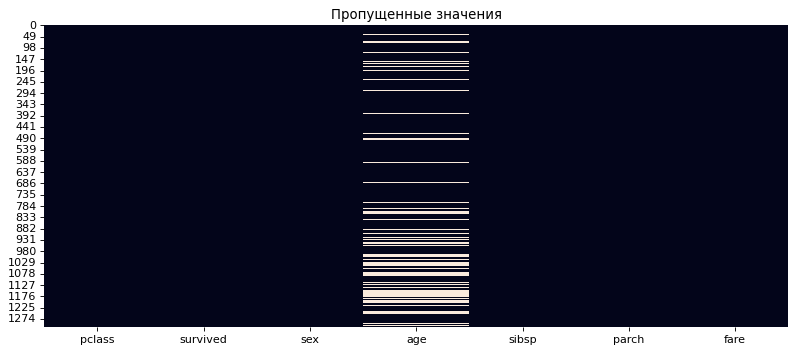

In [8]:
plt.figure(figsize=(12,5), dpi= 80)
sns.heatmap(df.isnull(), cbar = False).set_title("Пропущенные значения")
plt.show()

In [9]:
df['age'].fillna(df['age'].mean(), inplace=True)
df.head()

,pclass,survived,sex,age,sibsp,parch,fare
0,1.0,1.0,female,29.0000,0.0,0.0,211.3375
1,1.0,1.0,male,0.9167,1.0,2.0,151.5500
2,1.0,0.0,female,2.0000,1.0,2.0,151.5500
3,1.0,0.0,male,30.0000,1.0,2.0,151.5500
4,1.0,0.0,female,25.0000,1.0,2.0,151.5500


In [10]:
df = df.dropna()
df.head()

,pclass,survived,sex,age,sibsp,parch,fare
0,1.0,1.0,female,29.0000,0.0,0.0,211.3375
1,1.0,1.0,male,0.9167,1.0,2.0,151.5500
2,1.0,0.0,female,2.0000,1.0,2.0,151.5500
3,1.0,0.0,male,30.0000,1.0,2.0,151.5500
4,1.0,0.0,female,25.0000,1.0,2.0,151.5500


In [11]:
df.isna().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [12]:
df["sex"].replace({"female": 0, "male": 1}, inplace=True)
df.head()

,pclass,survived,sex,age,sibsp,parch,fare
0,1.0,1.0,0,29.0000,0.0,0.0,211.3375
1,1.0,1.0,1,0.9167,1.0,2.0,151.5500
2,1.0,0.0,0,2.0000,1.0,2.0,151.5500
3,1.0,0.0,1,30.0000,1.0,2.0,151.5500
4,1.0,0.0,0,25.0000,1.0,2.0,151.5500


# 2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции

In [13]:
df.shape

(1308, 7)

In [14]:
df = df.drop_duplicates()
df.shape

(1107, 7)

# 3. Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

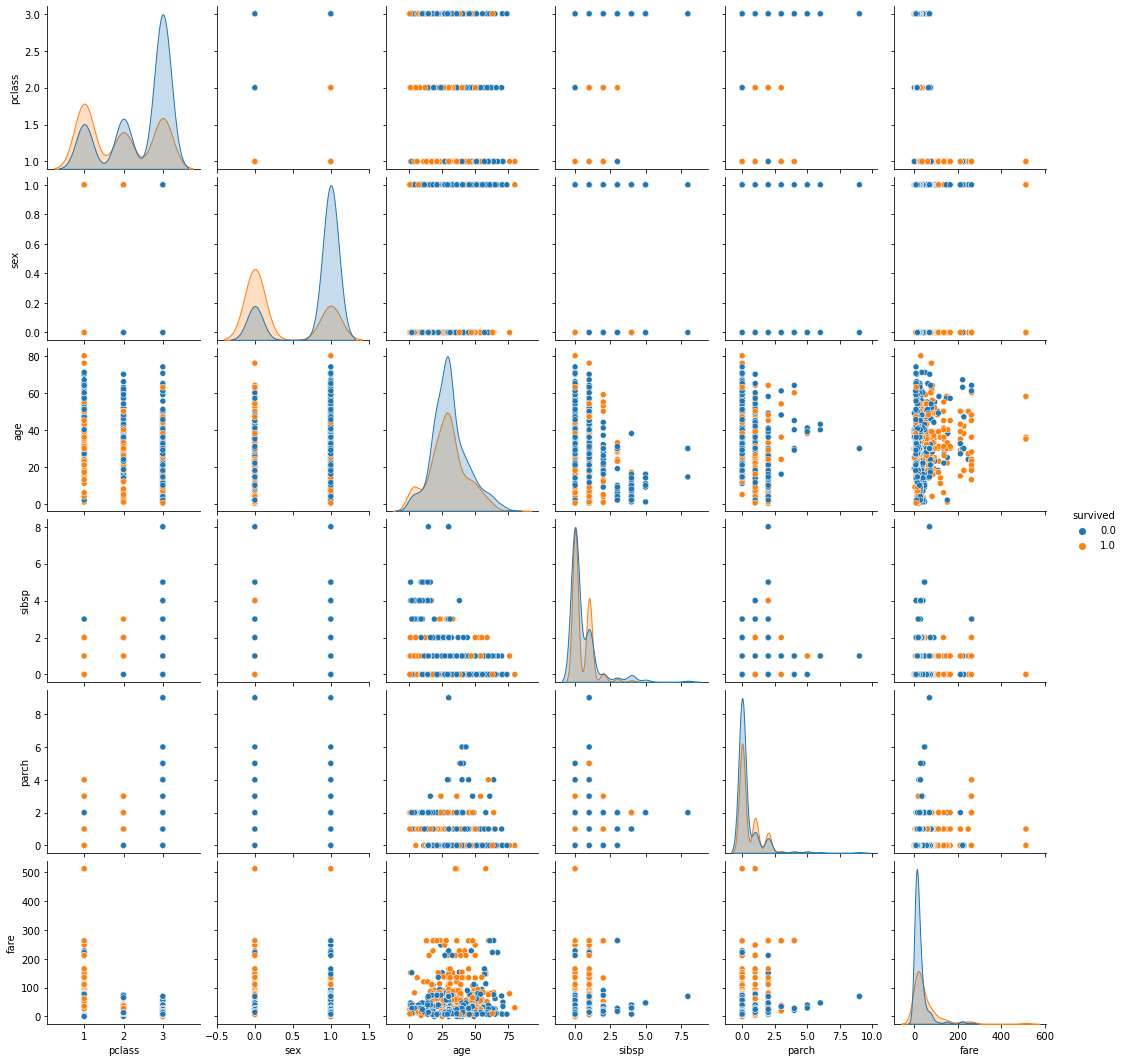

In [15]:
sns.pairplot(df, hue="survived")

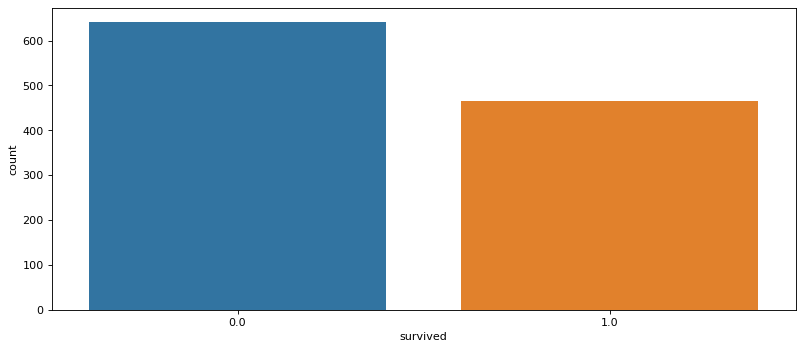

In [16]:
plt.figure(figsize=(12,5), dpi= 80)
sns.countplot(x = 'survived', data = df)
plt.show()

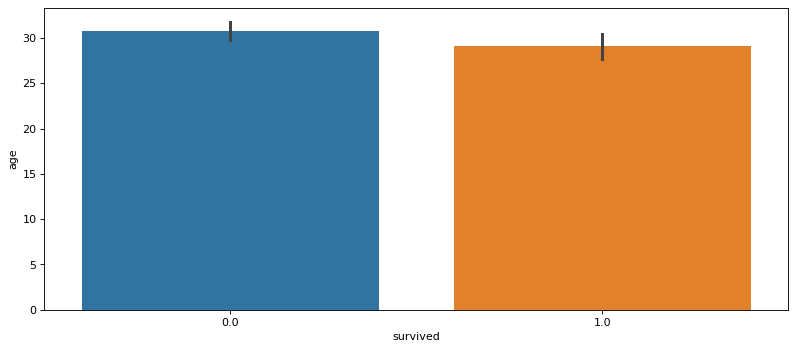

In [17]:
plt.figure(figsize=(12,5), dpi= 80)
sns.barplot(x="survived", y="age", data=df)
plt.show()

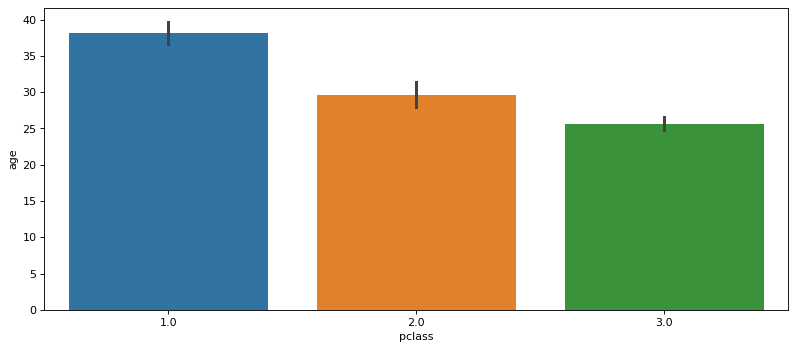

In [18]:
plt.figure(figsize=(12,5), dpi= 80)
sns.barplot(x="pclass", y="age", data=df)
plt.show()

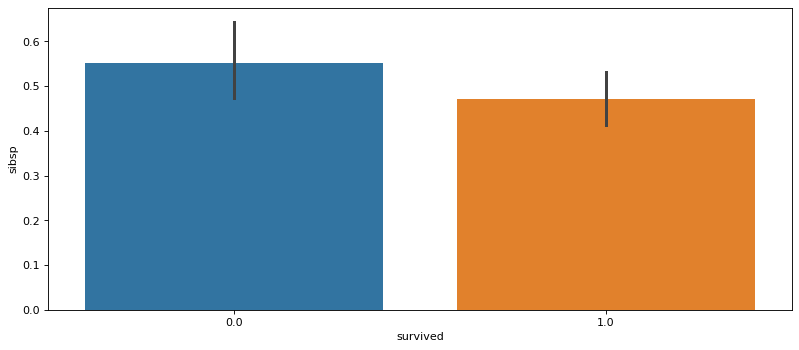

In [19]:
plt.figure(figsize=(12,5), dpi= 80)
sns.barplot(x="survived", y="sibsp", data=df)
plt.show()

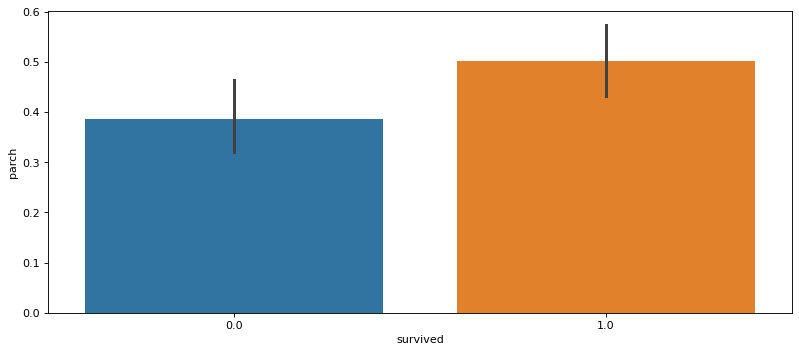

In [20]:
plt.figure(figsize=(12,5), dpi= 80)
sns.barplot(x="survived", y="parch", data=df)
plt.show()

# 4. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию)

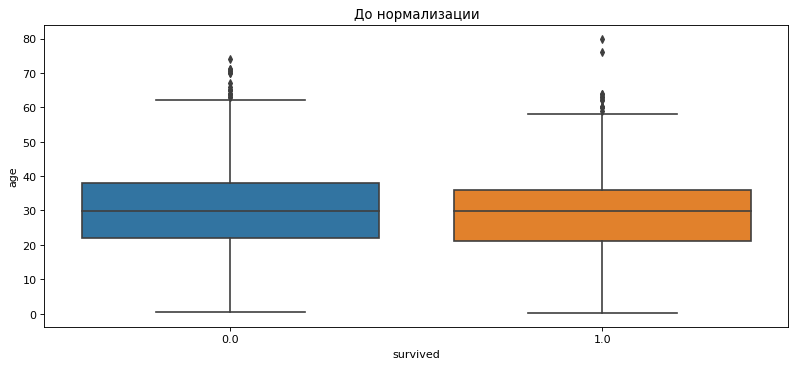

In [21]:
plt.figure(figsize=(12,5), dpi= 80)
sns.boxplot(x=df["survived"], y=df["age"]).set_title("До нормализации")
plt.show()

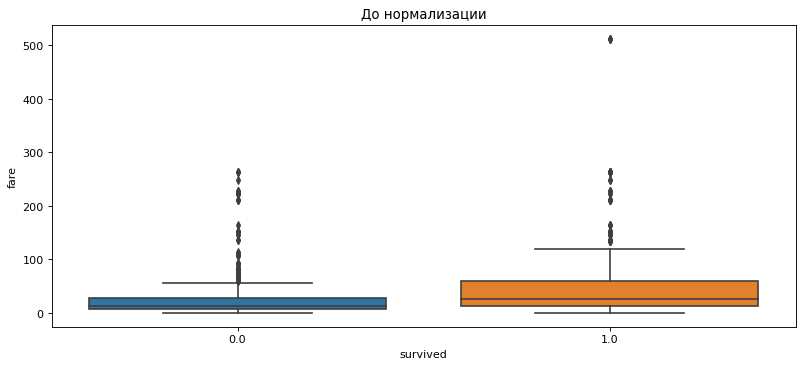

In [22]:
plt.figure(figsize=(12,5), dpi= 80)
sns.boxplot(x=df["survived"], y=df["fare"]).set_title("До нормализации")
plt.show()

In [23]:
from sklearn.preprocessing import MinMaxScaler

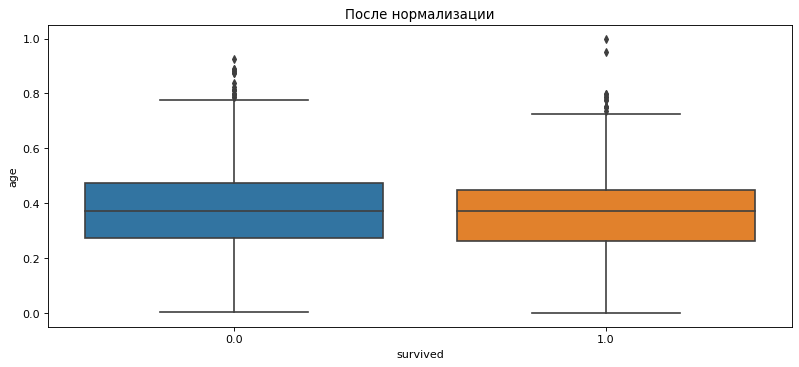

In [24]:
# Стандартизация
cols = df.columns
ms = MinMaxScaler()
df_scaled = ms.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=cols)
plt.figure(figsize=(12,5), dpi= 80)
sns.boxplot(x=df_scaled["survived"], y=df_scaled["age"]).set_title("После нормализации")
plt.show()


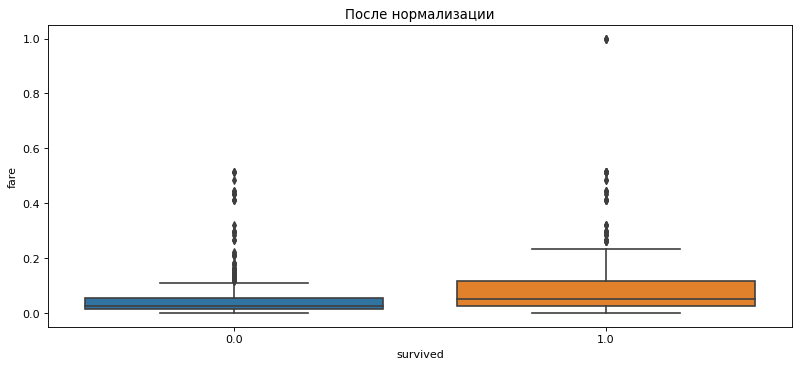

In [25]:
plt.figure(figsize=(12,5), dpi= 80)
sns.boxplot(x=df_scaled["survived"], y=df_scaled["fare"]).set_title("После нормализации")
plt.show()

# 5. Выполните замену категориальных признаков; выберите и обоснуйте способ замены

Замена признака sex была произведена в пункте 1.

In [26]:
# df["sex"].replace({"female": 0, "male": 1}, inplace=True)

Замена была произведена именно таким образом, так как это бинарный признак

# 6. Оцените корреляцию между признаками и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации)

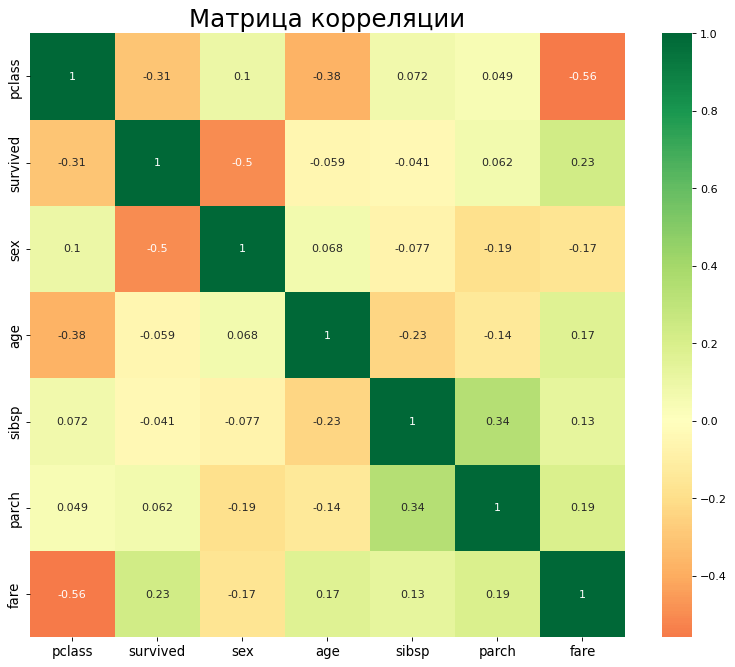

In [27]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df_scaled.corr(), xticklabels=df_scaled.corr().columns, yticklabels=df_scaled.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Матрица корреляции', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# 7. Заполните пропущенные значения в данных

In [28]:
df_scaled.isna().sum() # выполнено ранее

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

# 8. Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию

* В качестве цели(target) был выбран признак survived(выжил ли пассажир)

In [29]:
df = df_scaled.copy()


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate

features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare'] # признаки
X = df[features]
y = df['survived'] # Цель

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

<h1 style="text-align:center; text-decoration: underline">KNeighborsClassifier</h1>

In [31]:
params = { 'n_neighbors': range(5,15)}

# выбор параметров
grid = GridSearchCV(KNeighborsClassifier(), params, cv=5)
grid.fit(X_train, y_train)

grid.best_params_


{'n_neighbors': 6}

In [32]:
kNN = KNeighborsClassifier(n_neighbors=grid.best_params_["n_neighbors"])


In [33]:
# Кроссвалидация
cv_results = cross_validate(kNN, X_test, y_test, cv = 5)
sorted(cv_results.keys())

cv_results['test_score']

array([0.71641791, 0.80597015, 0.7761194 , 0.78787879, 0.75757576])

In [34]:
print('Точность на кроссвалидации: {:.4f}'.format(cv_results['test_score'][0]))

Точность на кроссвалидации: 0.7164


In [35]:
kNN.fit(X_train, y_train) # обучение

KNeighborsClassifier(n_neighbors=6)

In [36]:
y_pred_knn = kNN.predict(X_test) # предсказание
y_pred_knn[:100]

array([0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.])

In [37]:
kNN.predict_proba(X_test)[:10, ] # вероятность отнесения к классу

array([[0.5       , 0.5       ],
       [0.83333333, 0.16666667],
       [0.5       , 0.5       ],
       [0.83333333, 0.16666667],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       [0.66666667, 0.33333333],
       [0.5       , 0.5       ],
       [0.66666667, 0.33333333],
       [1.        , 0.        ]])

In [38]:
from sklearn.metrics import accuracy_score

print('Точность предсказания: {0:0.4f}'. format(accuracy_score(y_test, y_pred_knn)))

Точность предсказания: 0.7928


In [39]:
print('Оценка обучения на тестовой выборке: {:.4f}'.format(kNN.score(X_train, y_train)))
print('Оценка обучения на тренировочной выборке: {:.4f}'.format(kNN.score(X_test, y_test)))

Оценка обучения на тестовой выборке: 0.8088
Оценка обучения на тренировочной выборке: 0.7928


In [40]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_knn)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[173  22]
 [ 47  91]]

True Positives(TP) =  173

True Negatives(TN) =  91

False Positives(FP) =  22

False Negatives(FN) =  47


<AxesSubplot:>

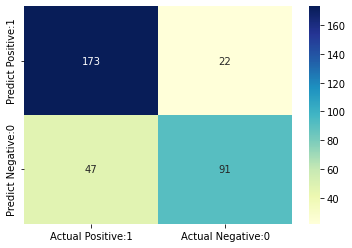

In [41]:
plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [42]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.79      0.89      0.83       195
         1.0       0.81      0.66      0.73       138

    accuracy                           0.79       333
   macro avg       0.80      0.77      0.78       333
weighted avg       0.79      0.79      0.79       333



In [43]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [44]:
classification_accuracy_cnn = (TP + TN) / float(TP + TN + FP + FN)
print('Accuracy : {0:0.4f}'.format(classification_accuracy_cnn))

Accuracy : 0.7928


In [45]:
classification_error_knn = (FP + FN) / float(TP + TN + FP + FN)
print('Error : {0:0.4f}'.format(classification_error_knn))

Error : 0.2072


In [46]:
precision_knn = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision_knn))

Precision : 0.8872


In [47]:
recall_knn = TP / float(TP + FN)
print('Recall : {0:0.4f}'.format(recall_knn))

Recall : 0.7864


In [48]:
TPR_knn = TP / float(TP + FN)
print('TPR : {0:0.4f}'.format(TPR_knn))

TPR : 0.7864


In [49]:
FPR_knn = FP / float(FP + TN)
print('FPR : {0:0.4f}'.format(FPR_knn))

FPR : 0.1947


In [50]:
specificity_knn = TN / (TN + FP)
print('Специфичность : {0:0.4f}'.format(specificity_knn))


Специфичность : 0.8053


In [51]:
from sklearn.metrics import average_precision_score
average_precision_score_knn = average_precision_score(y_test, y_pred_knn)
average_precision_score_knn

0.6721787196969959

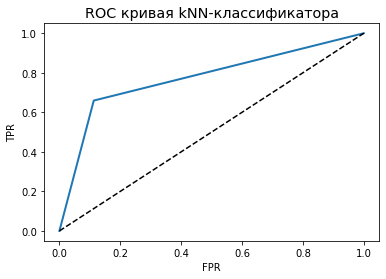

In [52]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC кривая kNN-классификатора')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()


In [53]:
from sklearn.metrics import roc_auc_score

ROC_AUC_knn = roc_auc_score(y_test, y_pred_knn)
print('ROC AUC : {:.4f}'.format(ROC_AUC_knn))

ROC AUC : 0.7733


In [54]:
from sklearn.model_selection import cross_val_score

сross_validated_ROC_AUC_knn = cross_val_score(kNN, X_train, y_train, cv=5, scoring='roc_auc').mean()
print('ROC AUC после кроссвалидации: {:.4f}'.format(сross_validated_ROC_AUC_knn))

ROC AUC после кроссвалидации: 0.7984


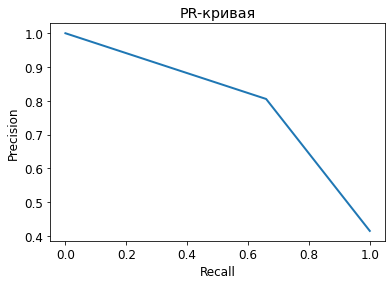

In [55]:
from sklearn. metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_knn)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, linewidth=2)
plt.rcParams['font.size'] = 12
plt.title('PR-кривая')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

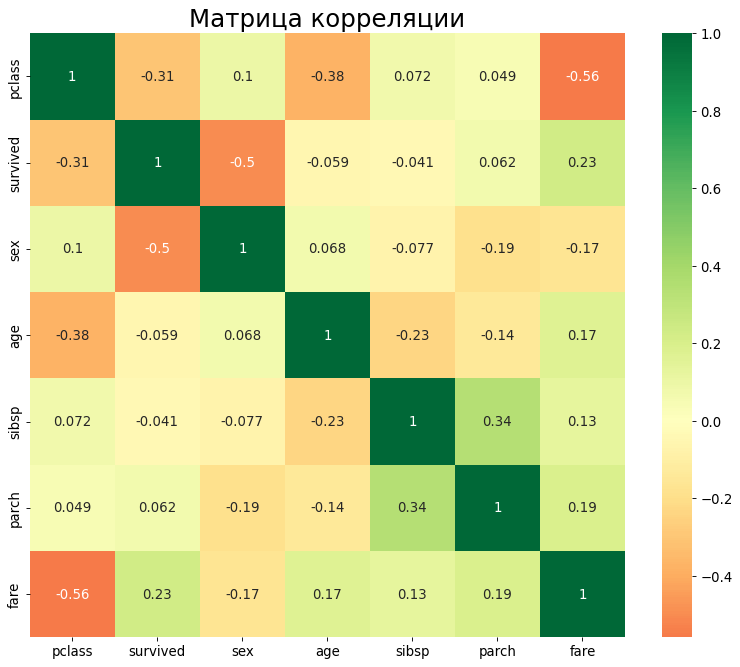

In [56]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df_scaled.corr(), xticklabels=df_scaled.corr().columns, yticklabels=df_scaled.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Матрица корреляции', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Признак fare будет удален, так как полностью зависит от признака pcass. Чем меньше класс пассажира, тем больше плата за билет

In [57]:
df = df_scaled.drop(columns='fare')
df.head()

,pclass,survived,sex,age,sibsp,parch
0,0.0,1.0,0.0,0.361169,0.000,0.000000
1,0.0,1.0,1.0,0.009395,0.125,0.222222
2,0.0,0.0,0.0,0.022964,0.125,0.222222
3,0.0,0.0,1.0,0.373695,0.125,0.222222
4,0.0,0.0,0.0,0.311064,0.125,0.222222


<h1 style="text-align:center; text-decoration: underline"> MLPClassifier(персептрон)</h1>

In [58]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=43, max_iter=300)


In [59]:
# Кроссвалидация
cv_results = cross_validate(mlp, X_test, y_test, cv = 5)
sorted(cv_results.keys())

cv_results['test_score']

array([0.80597015, 0.74626866, 0.85074627, 0.74242424, 0.75757576])

In [60]:
print('Точность на кроссвалидации: {:.4f}'.format(cv_results['test_score'][0]))

Точность на кроссвалидации: 0.8060


In [61]:
# обучение
mlp.fit(X_test, y_test)

MLPClassifier(max_iter=300, random_state=43)

In [62]:
y_pred_mlp = mlp.predict(X_test) # предсказание
y_pred_mlp[:100]

array([0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.])

In [63]:
mlp.predict_proba(X_test)[:10, ] # вероятность отнесения к классу

array([[0.51363462, 0.48636538],
       [0.85734583, 0.14265417],
       [0.53796721, 0.46203279],
       [0.88809655, 0.11190345],
       [0.14796167, 0.85203833],
       [0.81480097, 0.18519903],
       [0.3846852 , 0.6153148 ],
       [0.67737444, 0.32262556],
       [0.85992055, 0.14007945],
       [0.79959019, 0.20040981]])

In [64]:
from sklearn.metrics import accuracy_score

print('Точность предсказания: {0:0.4f}'. format(accuracy_score(y_test, y_pred_mlp)))

Точность предсказания: 0.8138


In [65]:
print('Оценка обучения на тестовой выборке: {:.4f}'.format(mlp.score(X_train, y_train)))
print('Оценка обучения на тренировочной выборке: {:.4f}'.format(mlp.score(X_test, y_test)))

Оценка обучения на тестовой выборке: 0.7649
Оценка обучения на тренировочной выборке: 0.8138


In [66]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_mlp)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[176  19]
 [ 43  95]]

True Positives(TP) =  176

True Negatives(TN) =  95

False Positives(FP) =  19

False Negatives(FN) =  43


<AxesSubplot:>

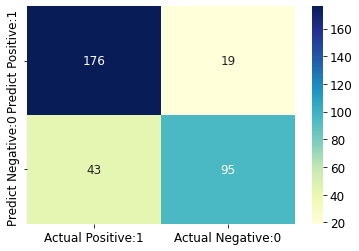

In [67]:
plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [68]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

         0.0       0.80      0.90      0.85       195
         1.0       0.83      0.69      0.75       138

    accuracy                           0.81       333
   macro avg       0.82      0.80      0.80       333
weighted avg       0.82      0.81      0.81       333



In [69]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [70]:
classification_accuracy_mlp = (TP + TN) / float(TP + TN + FP + FN)
print('Accuracy : {0:0.4f}'.format(classification_accuracy_mlp))

Accuracy : 0.8138


In [71]:
classification_error_mlp = (FP + FN) / float(TP + TN + FP + FN)
print('Error : {0:0.4f}'.format(classification_error_mlp))

Error : 0.1862


In [72]:
precision_mlp = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision_mlp))

Precision : 0.9026


In [73]:
specificity_mlp = TN / (TN + FP)
print('Специфичность : {0:0.4f}'.format(specificity_mlp))

Специфичность : 0.8333


In [74]:
from sklearn.metrics import average_precision_score
average_precision_score_mlp = average_precision_score(y_test, y_pred_mlp)
average_precision_score_mlp

0.7028006267136702

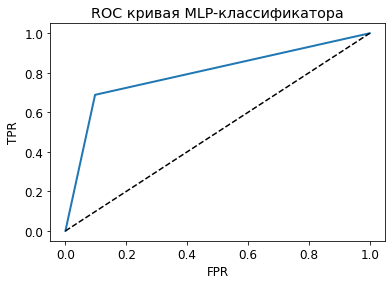

In [75]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_mlp)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC кривая MLP-классификатора')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [76]:
from sklearn.metrics import roc_auc_score

ROC_AUC_mlp = roc_auc_score(y_test, y_pred_mlp)
print('ROC AUC : {:.4f}'.format(ROC_AUC_mlp))

ROC AUC : 0.7955


In [77]:
from sklearn.model_selection import cross_val_score

сross_validated_ROC_AUC_mlp = cross_val_score(mlp, X_train, y_train, cv=5, scoring='roc_auc').mean()
print('ROC AUC после кроссвалидации: {:.4f}'.format(сross_validated_ROC_AUC_mlp))

ROC AUC после кроссвалидации: 0.8222


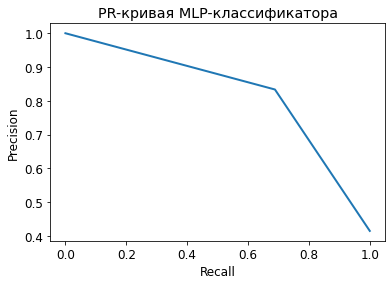

In [78]:
from sklearn. metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_mlp)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, linewidth=2)
plt.rcParams['font.size'] = 12
plt.title('PR-кривая MLP-классификатора')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# 9. Вывод
* Статистические показатели данных моделей после обучения почти совпадают и являются относительно высокими
* PR и ROC имеют высокую схожесть

Следовательно, данные модели можно считать статистически значимыми